In [10]:
file_path_10000 = "/data/scratch/kaivuh/kronfluencer/influence_results/wikitext/scores_ekfac_pairwise/pairwise_scores.safetensors"
file_path_2000 = "/data/scratch/kaivuh/kronfluencer/influence_results/wikitext/scores_ekfac_pairwise_step2000/pairwise_scores.safetensors"
other_paths = []
for steps in [1000, 4000, 6000, 8000]:
    other_paths.append(f"/data/scratch/kaivuh/kronfluencer/influence_results/wikitext_step{steps}/scores_ekfac_pairwise_step{steps}/pairwise_scores.safetensors")

In [11]:
all_paths_ordered = other_paths[:1] + [file_path_2000] + other_paths[1:] + [file_path_10000]

Loaded tensor_1000 with shape torch.Size([3686, 3686])
Loaded tensor_2000 with shape torch.Size([3686, 3686])
Loaded tensor_4000 with shape torch.Size([3686, 3686])
Loaded tensor_6000 with shape torch.Size([3686, 3686])
Loaded tensor_8000 with shape torch.Size([3686, 3686])
Loaded tensor_10000 with shape torch.Size([3686, 3686])


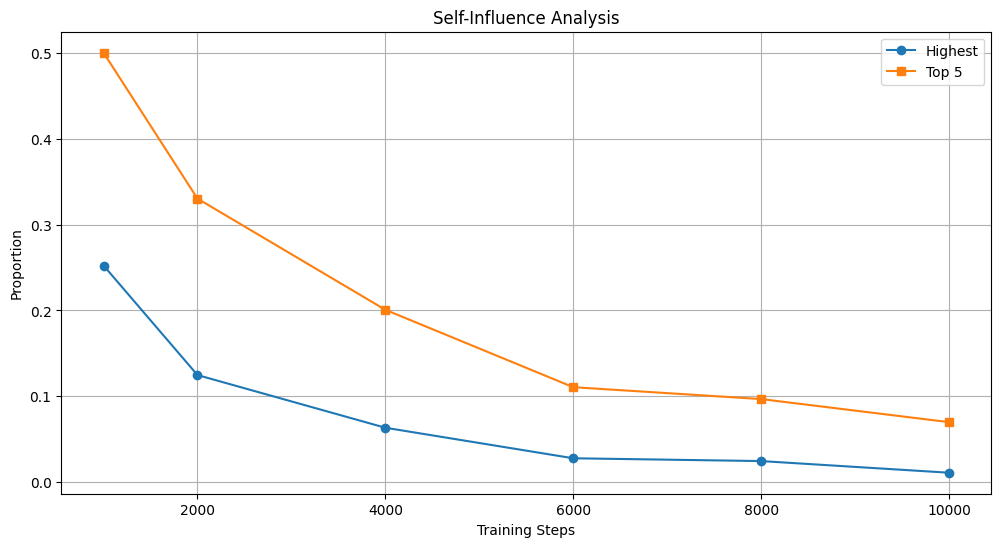

Results:
Step 1000:
  Proportion of self-influence as highest: 0.2523
  Proportion of self-influence in top 5: 0.5000
Step 2000:
  Proportion of self-influence as highest: 0.1248
  Proportion of self-influence in top 5: 0.3302
Step 4000:
  Proportion of self-influence as highest: 0.0635
  Proportion of self-influence in top 5: 0.2008
Step 6000:
  Proportion of self-influence as highest: 0.0279
  Proportion of self-influence in top 5: 0.1107
Step 8000:
  Proportion of self-influence as highest: 0.0247
  Proportion of self-influence in top 5: 0.0969
Step 10000:
  Proportion of self-influence as highest: 0.0111
  Proportion of self-influence in top 5: 0.0700


In [13]:
import torch
from safetensors import safe_open
import matplotlib.pyplot as plt
import numpy as np

def load_tensor(file_path):
    with safe_open(file_path, framework="pt", device="cuda:2") as f:
        first_key = list(f.keys())[0]
        return f.get_tensor(first_key)

# Load all tensors
tensors = {}
steps = [1000, 2000, 4000, 6000, 8000, 10000]

for path, step in zip(all_paths_ordered, steps):
    tensor_name = f"tensor_{step}"
    tensors[tensor_name] = load_tensor(path)
    print(f"Loaded {tensor_name} with shape {tensors[tensor_name].shape}")

# Now you can access tensors like this: tensors["tensor_1000"], tensors["tensor_2000"], etc.

def analyze_self_influence(tensor):
    diagonal = torch.diag(tensor)
    total_nodes = tensor.shape[0]
    
    # Check if diagonal is the highest
    highest_count = (diagonal == tensor.max(dim=1).values).sum().item()
    
    # Check if diagonal is in top 5
    top_5_count = 0
    for i in range(total_nodes):
        if diagonal[i] in tensor[i].topk(5).values:
            top_5_count += 1
    
    return highest_count / total_nodes, top_5_count / total_nodes

# Analyze tensors
highest_proportions = []
top_5_proportions = []

for step in steps:
    tensor_name = f"tensor_{step}"
    highest_prop, top_5_prop = analyze_self_influence(tensors[tensor_name])
    highest_proportions.append(highest_prop)
    top_5_proportions.append(top_5_prop)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(steps, highest_proportions, marker='o', label='Highest')
plt.plot(steps, top_5_proportions, marker='s', label='Top 5')
plt.xlabel('Training Steps')
plt.ylabel('Proportion')
plt.title('Self-Influence Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
print("Results:")
for step, highest, top_5 in zip(steps, highest_proportions, top_5_proportions):
    print(f"Step {step}:")
    print(f"  Proportion of self-influence as highest: {highest:.4f}")
    print(f"  Proportion of self-influence in top 5: {top_5:.4f}")

In [16]:
import torch
from safetensors import safe_open
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.sparse import csr_matrix
from sklearn.cluster import SpectralClustering
from tqdm import tqdm

Processing tensors:   0%|          | 0/6 [00:00<?, ?it/s]


Analysis for step 1000:
Number of nodes: 3686
Number of edges: 36860
Is strongly connected: False
Number of strongly connected components: 3152


/data/scratch/kaivuh/miniforge3/envs/influence/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
Processing tensors:  17%|█▋        | 1/6 [00:01<00:06,  1.28s/it]

Cluster sizes: [np.int64(440), np.int64(1687), np.int64(166), np.int64(977), np.int64(416)]
Top 5 nodes by in-degree centrality: [(1519, 0.2735413839891452), (286, 0.24314789687924018), (2765, 0.2390773405698779), (2369, 0.20542740841248305), (140, 0.17503392130257803)]
Top 5 nodes by out-degree centrality: [(0, 0.00271370420624152), (1, 0.00271370420624152), (2, 0.00271370420624152), (3, 0.00271370420624152), (4, 0.00271370420624152)]

Analysis for step 2000:
Number of nodes: 3686
Number of edges: 36860
Is strongly connected: False
Number of strongly connected components: 3296


/data/scratch/kaivuh/miniforge3/envs/influence/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
Processing tensors:  33%|███▎      | 2/6 [00:02<00:05,  1.30s/it]

Cluster sizes: [np.int64(964), np.int64(222), np.int64(1765), np.int64(326), np.int64(409)]
Top 5 nodes by in-degree centrality: [(1471, 0.4849389416553596), (2427, 0.45020352781546813), (1966, 0.444504748982361), (2039, 0.41872455902306654), (322, 0.25535956580732705)]
Top 5 nodes by out-degree centrality: [(0, 0.00271370420624152), (1, 0.00271370420624152), (2, 0.00271370420624152), (3, 0.00271370420624152), (4, 0.00271370420624152)]

Analysis for step 4000:
Number of nodes: 3686
Number of edges: 36860
Is strongly connected: False
Number of strongly connected components: 3451


/data/scratch/kaivuh/miniforge3/envs/influence/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
Processing tensors:  50%|█████     | 3/6 [00:04<00:04,  1.37s/it]

Cluster sizes: [np.int64(1507), np.int64(594), np.int64(690), np.int64(654), np.int64(241)]
Top 5 nodes by in-degree centrality: [(273, 0.5430122116689281), (2451, 0.4843962008141113), (1878, 0.3926729986431479), (2476, 0.34464043419267304), (653, 0.30447761194029854)]
Top 5 nodes by out-degree centrality: [(0, 0.00271370420624152), (1, 0.00271370420624152), (2, 0.00271370420624152), (3, 0.00271370420624152), (4, 0.00271370420624152)]

Analysis for step 6000:
Number of nodes: 3686
Number of edges: 36860
Is strongly connected: False
Number of strongly connected components: 3541


/data/scratch/kaivuh/miniforge3/envs/influence/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
Processing tensors:  67%|██████▋   | 4/6 [00:05<00:02,  1.31s/it]

Cluster sizes: [np.int64(1295), np.int64(567), np.int64(373), np.int64(488), np.int64(963)]
Top 5 nodes by in-degree centrality: [(175, 0.5554952510176391), (2184, 0.4876526458616011), (1260, 0.47164179104477616), (1456, 0.44857530529172324), (2728, 0.43310719131614656)]
Top 5 nodes by out-degree centrality: [(0, 0.00271370420624152), (1, 0.00271370420624152), (2, 0.00271370420624152), (3, 0.00271370420624152), (4, 0.00271370420624152)]

Analysis for step 8000:
Number of nodes: 3686
Number of edges: 36860
Is strongly connected: False
Number of strongly connected components: 3535


/data/scratch/kaivuh/miniforge3/envs/influence/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
Processing tensors:  83%|████████▎ | 5/6 [00:06<00:01,  1.26s/it]

Cluster sizes: [np.int64(538), np.int64(661), np.int64(1099), np.int64(763), np.int64(625)]
Top 5 nodes by in-degree centrality: [(3374, 0.49769335142469473), (2438, 0.47842605156038), (1968, 0.4740841248303935), (2595, 0.4526458616010855), (3391, 0.3978290366350068)]
Top 5 nodes by out-degree centrality: [(0, 0.00271370420624152), (1, 0.00271370420624152), (2, 0.00271370420624152), (3, 0.00271370420624152), (4, 0.00271370420624152)]

Analysis for step 10000:
Number of nodes: 3686
Number of edges: 36860
Is strongly connected: False
Number of strongly connected components: 3591


/data/scratch/kaivuh/miniforge3/envs/influence/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
Processing tensors: 100%|██████████| 6/6 [00:07<00:00,  1.27s/it]

Cluster sizes: [np.int64(776), np.int64(471), np.int64(948), np.int64(638), np.int64(853)]
Top 5 nodes by in-degree centrality: [(1046, 0.5240162822252374), (2994, 0.45861601085481685), (1310, 0.4426051560379919), (1810, 0.437449118046133), (2437, 0.4043419267299865)]
Top 5 nodes by out-degree centrality: [(0, 0.00271370420624152), (1, 0.00271370420624152), (2, 0.00271370420624152), (3, 0.00271370420624152), (4, 0.00271370420624152)]


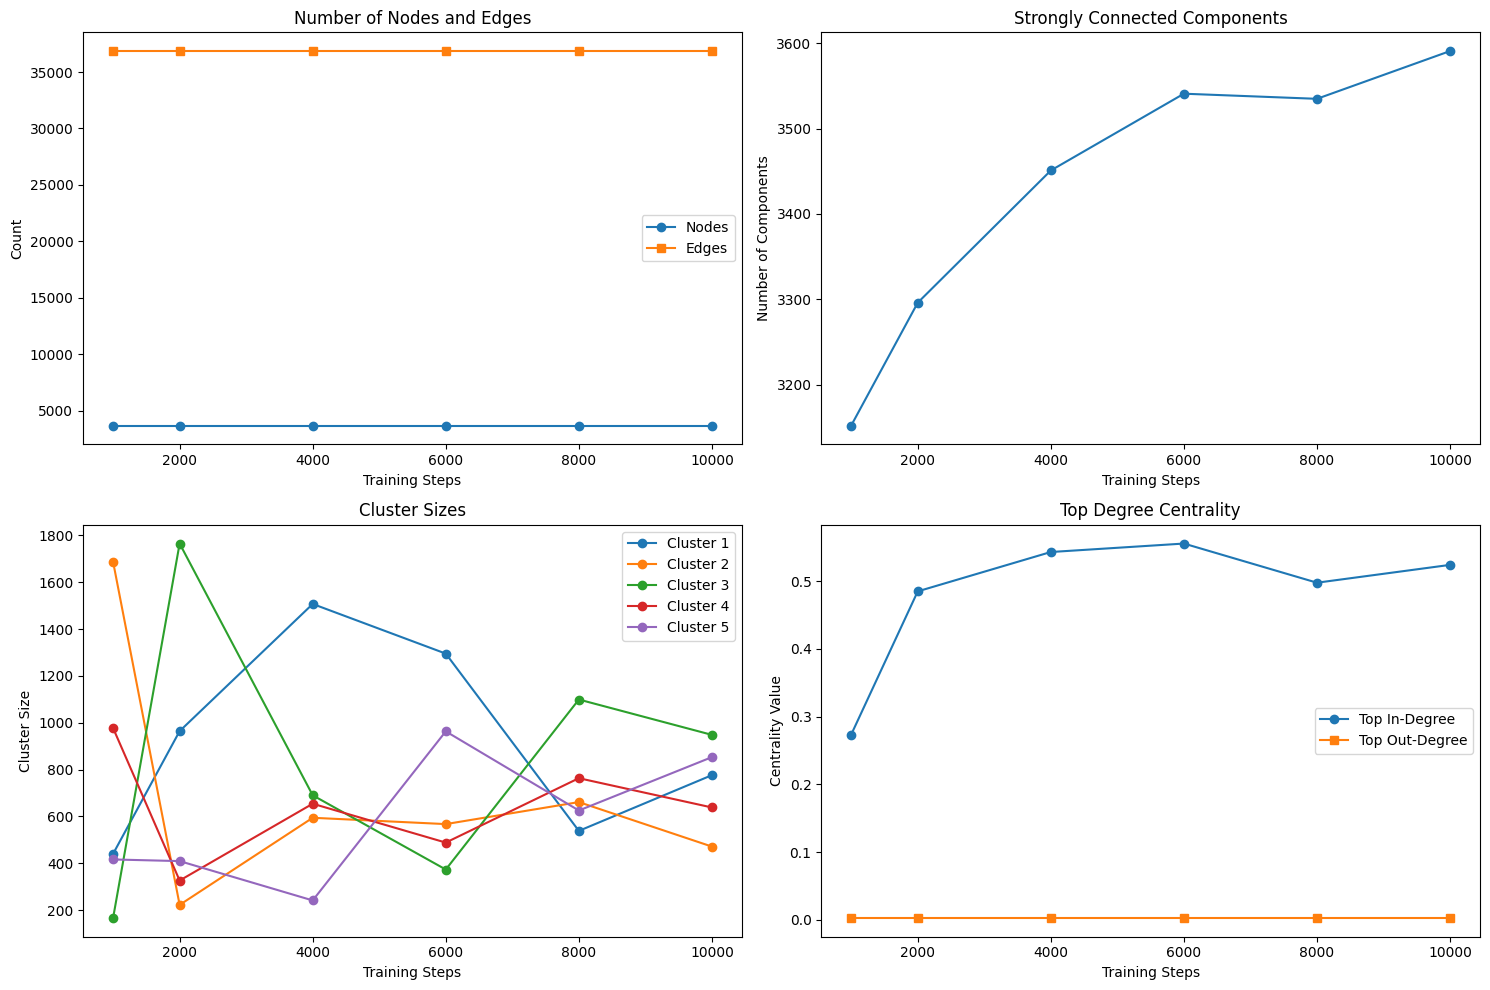

In [19]:
def create_sparse_tensor(tensor):
    sparse_tensor = torch.zeros_like(tensor)
    top_10_values, _ = torch.topk(tensor, k=10, dim=1)
    threshold = top_10_values[:, -1].unsqueeze(1)
    sparse_tensor = torch.where(tensor >= threshold, torch.ones_like(tensor), torch.zeros_like(tensor))
    return sparse_tensor

def tensor_to_networkx(tensor):
    sparse_tensor = csr_matrix(tensor.cpu().numpy())
    G = nx.from_scipy_sparse_array(sparse_tensor, create_using=nx.DiGraph)
    return G

import torch
from safetensors import safe_open
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.sparse import csr_matrix
from sklearn.cluster import SpectralClustering
from tqdm import tqdm

# ... (keep the previous loading and analysis functions)

# Data structures to store results for plotting
nodes_edges = {'nodes': [], 'edges': []}
strong_components = []
cluster_sizes = []
top_in_degree = []
top_out_degree = []

def analyze_graph(G, step):
    print(f"\nAnalysis for step {step}:")
    nodes = G.number_of_nodes()
    edges = G.number_of_edges()
    print(f"Number of nodes: {nodes}")
    print(f"Number of edges: {edges}")
    nodes_edges['nodes'].append(nodes)
    nodes_edges['edges'].append(edges)
    
    print(f"Is strongly connected: {nx.is_strongly_connected(G)}")
    n_components = nx.number_strongly_connected_components(G)
    print(f"Number of strongly connected components: {n_components}")
    strong_components.append(n_components)
    
    # Spectral clustering
    adj_matrix = nx.to_numpy_array(G)
    n_clusters = 5  # You can adjust this
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', n_init=100, assign_labels='discretize')
    clustering.fit(adj_matrix)
    
    sizes = [sum(clustering.labels_ == i) for i in range(n_clusters)]
    print(f"Cluster sizes: {sizes}")
    cluster_sizes.append(sizes)
    
    # Degree centrality
    in_degree_centrality = nx.in_degree_centrality(G)
    out_degree_centrality = nx.out_degree_centrality(G)
    top_in = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    top_out = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Top 5 nodes by in-degree centrality: {top_in}")
    print(f"Top 5 nodes by out-degree centrality: {top_out}")
    top_in_degree.append(top_in[0][1])  # Append the highest in-degree centrality
    top_out_degree.append(top_out[0][1])  # Append the highest out-degree centrality

# Process each tensor
for step in tqdm(steps, desc="Processing tensors"):
    tensor_name = f"tensor_{step}"
    original_tensor = tensors[tensor_name]
    
    # Create sparse tensor
    sparse_tensor = create_sparse_tensor(original_tensor)
    
    # Convert to NetworkX graph
    G = tensor_to_networkx(sparse_tensor)
    
    # Analyze graph
    analyze_graph(G, step)

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Number of nodes and edges
plt.subplot(2, 2, 1)
plt.plot(steps, nodes_edges['nodes'], marker='o', label='Nodes')
plt.plot(steps, nodes_edges['edges'], marker='s', label='Edges')
plt.xlabel('Training Steps')
plt.ylabel('Count')
plt.title('Number of Nodes and Edges')
plt.legend()

# Plot 2: Number of strongly connected components
plt.subplot(2, 2, 2)
plt.plot(steps, strong_components, marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Number of Components')
plt.title('Strongly Connected Components')

# Plot 3: Cluster sizes
plt.subplot(2, 2, 3)
cluster_sizes_array = np.array(cluster_sizes)
for i in range(5):
    plt.plot(steps, cluster_sizes_array[:, i], marker='o', label=f'Cluster {i+1}')
plt.xlabel('Training Steps')
plt.ylabel('Cluster Size')
plt.title('Cluster Sizes')
plt.legend()

# Plot 4: Top in-degree and out-degree centrality
plt.subplot(2, 2, 4)
plt.plot(steps, top_in_degree, marker='o', label='Top In-Degree')
plt.plot(steps, top_out_degree, marker='s', label='Top Out-Degree')
plt.xlabel('Training Steps')
plt.ylabel('Centrality Value')
plt.title('Top Degree Centrality')
plt.legend()

plt.tight_layout()
plt.show()